In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path


csv_dir = Path('csvs/')
all_files = Path.iterdir(csv_dir)
files_postfix = "_results.csv"

Read all

In [2]:
all_dfs = {}
for f in all_files:
    if not f.name.endswith(files_postfix):
        continue
    df = pd.read_csv(f)
    # method is a basename of the file
    method = os.path.basename(f)
    print(method)
    all_dfs[method] = df
all_dfs

graphafold_results.csv
sincfold_results.csv
ufold_results.csv
spotrna_results.csv


{'graphafold_results.csv':      PDB  Precision  Recall    F1   INF
 0   7YR6       0.75    0.90  0.82  0.82
 1   7YR7       0.61    0.64  0.62  0.62
 2   7ZJ4       0.85    0.65  0.74  0.74
 3   8BTZ       1.00    1.00  1.00  1.00
 4   8FZA       0.67    0.59  0.63  0.63
 5   8S95       0.90    0.75  0.82  0.82
 6   8TVZ       0.95    0.78  0.86  0.86
 7   8UO6       0.83    0.80  0.82  0.82
 8   8UYE       0.92    0.67  0.77  0.78
 9   8UYG       0.67    0.29  0.40  0.44
 10  8UYJ       0.78    0.58  0.67  0.67
 11  8UYS       1.00    0.87  0.93  0.93
 12  9B0L       0.40    0.25  0.31  0.32
 13  9BZ1       0.74    1.00  0.85  0.86
 14  9BZC       0.75    1.00  0.86  0.87,
 'sincfold_results.csv':      PDB  Precision  Recall    F1   INF  TP  FP  FN
 0   7YR6       0.00    0.00  0.00  0.00   0   2  10
 1   7YR7       0.00    0.00  0.00  0.00   0   2  22
 2   7ZJ4       0.00    0.00  0.00  0.00   0  18  66
 3   8BTZ       0.00    0.00  0.00  0.00   0  16  12
 4   8FZA       0.00    0.00

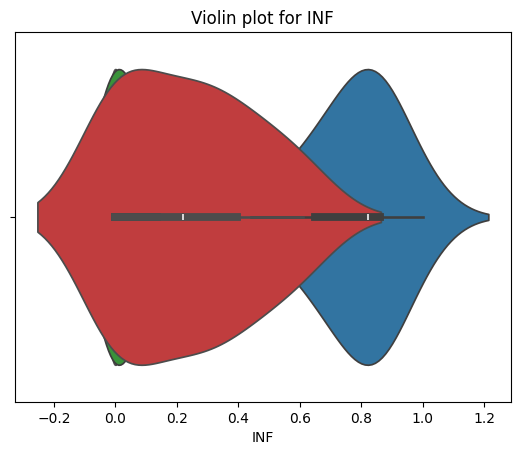

In [3]:
# make a violin plot
def plot_violin(df, column, title):
    sns.violinplot(x=column, data=df).set_title(title)

# plot all the dataframes
for f in all_dfs.keys():
    df = all_dfs[f]
    # get the column name from the file name
    column = 'INF'
    title = f"Violin plot for {column}"
    plot_violin(df, column, title)

In [4]:
results=[]
methods = {
    "graphafold_results.csv": "GraphaFold",
    "spotrna_results.csv": "SPOT-RNA",
    "sincfold_results.csv": "SincFold",
    "ufold_results.csv": "Ufold",
}
for method, df in all_dfs.items():
    m = methods[method]
    melted_df = df.melt(var_name='Metric', value_name="Value")
    melted_df["Method"] = m
    results.append(melted_df)




# Step 2: Concatenate into a single DataFrame
combined_df = pd.concat(results, ignore_index=True)
# drop rows where Metric is not INF
combined_df = combined_df[combined_df["Metric"] == "INF"]

combined_df

,Metric,Value,Method
60,INF,0.82,GraphaFold
61,INF,0.62,GraphaFold
62,INF,0.74,GraphaFold
63,INF,1.0,GraphaFold
64,INF,0.63,GraphaFold
65,INF,0.82,GraphaFold
66,INF,0.86,GraphaFold
67,INF,0.82,GraphaFold
68,INF,0.78,GraphaFold
69,INF,0.44,GraphaFold


In [5]:
# sort by method, GraphaFold first and the rest in alphabetical order
combined_df["Method"] = pd.Categorical(combined_df["Method"], categories=["GraphaFold", "SincFold", "SPOT-RNA", "Ufold"], ordered=True)

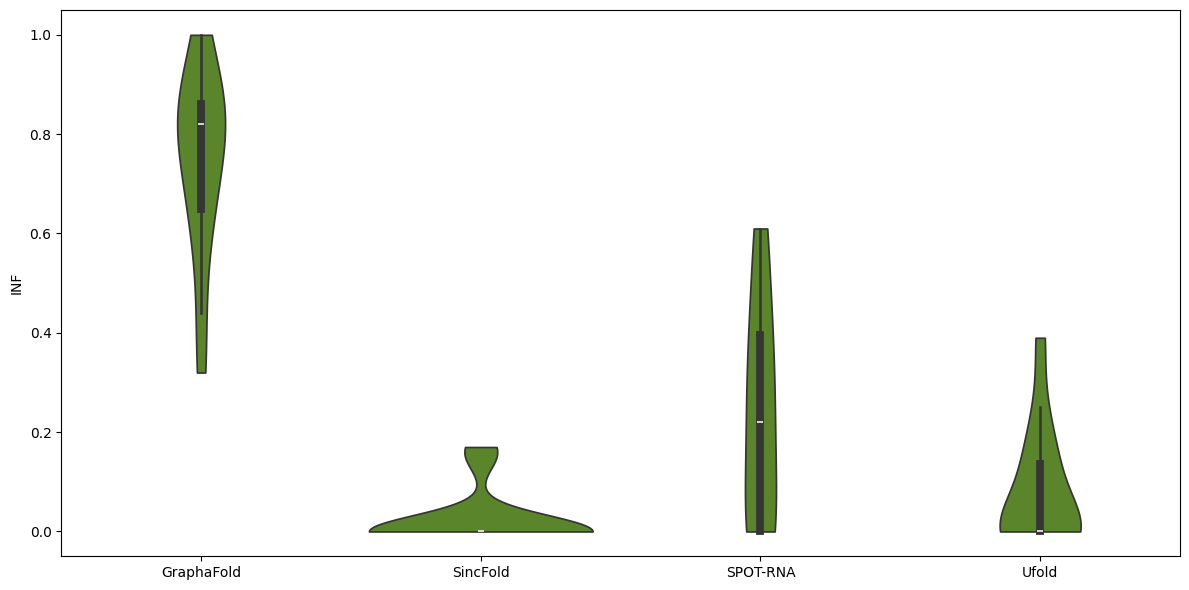

In [6]:
# # Step 3: Plot using seaborn
plt.figure(figsize=(12, 6))
# set color in hexadecimal value

sns.violinplot(data=combined_df, x="Method", y="Value", inner='box', native_scale=True, cut=0, color="#5b941cff")  # or dodge=True #107f80
# change x and y axis labels
plt.xlabel(None)
plt.ylabel("INF")
# plt.legend(title="Metric")
plt.tight_layout()
plt.show()

In [12]:
# combine all dataframes from all_dfs into a single dataframe. Merge by coulumns (i.e. values are columns)
df = pd.concat(all_dfs.values(), axis=1)
df.head()



,PDB,Precision,Recall,F1,INF,PDB,Precision,Recall,F1,INF,PDB,Precision,Recall,F1,INF,PDB,Precision,Recall,F1,INF
0,7PTK,0.92,0.88,0.90,0.90,7QR3,0.00,0.00,0.00,0.00,7QR3,0.00,0.00,0.00,0.00,7PTK,0.44,0.49,0.46,0.46
1,7PTL,0.96,0.83,0.89,0.90,7QR4,0.00,0.00,0.00,0.00,7QR4,0.00,0.00,0.00,0.00,7PTL,0.27,0.41,0.33,0.33
2,7YR6,0.75,0.90,0.82,0.82,7YR6,0.00,0.00,0.00,0.00,7YR6,0.00,0.00,0.00,0.00,7QR3,0.00,0.00,0.00,0.00
3,7YR7,0.61,0.64,0.62,0.62,7YR7,0.00,0.00,0.00,0.00,7YR7,0.38,0.17,0.23,0.25,7QR4,0.00,0.00,0.00,0.00
4,7ZJ4,0.85,0.65,0.74,0.74,7ZJ4,0.06,0.02,0.03,0.03,7ZJ4,0.29,0.17,0.22,0.22,7YR6,0.00,0.00,0.00,0.00
